In [1]:
from generate_test_beam import generate_test_beam, generate_test_images

/global/homes/r/rroussel/.conda/envs/phase_space_reconstruction/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([-25.], device='cuda:0') tensor(168.5200, device='cuda:0', dtype=torch.float64)
tensor([-18.6842], device='cuda:0') tensor(100.6844, device='cuda:0', dtype=torch.float64)
tensor([-12.3684], device='cuda:0') tensor(51.1164, device='cuda:0', dtype=torch.float64)
tensor([-6.0526], device='cuda:0') tensor(18.7647, device='cuda:0', dtype=torch.float64)
tensor([0.2632], device='cuda:0') tensor(2.6199, device='cuda:0', dtype=torch.float64)
tensor([6.5789], device='cuda:0') tensor(1.7124, device='cuda:0', dtype=torch.float64)
tensor([12.8947], device='cuda:0') tensor(15.1115, device='cuda:0', dtype=torch.float64)


/global/homes/r/rroussel/.conda/envs/phase_space_reconstruction/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


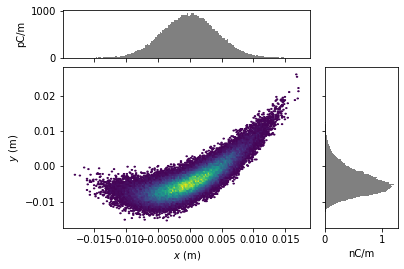

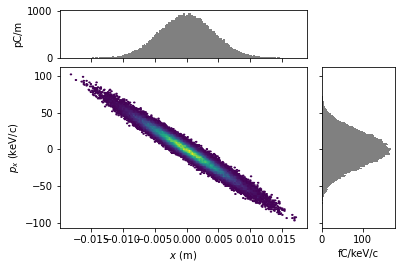

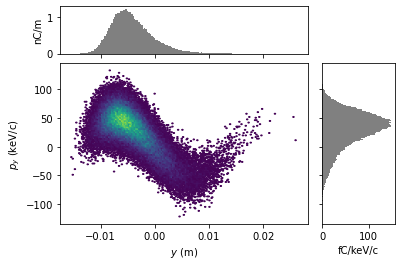

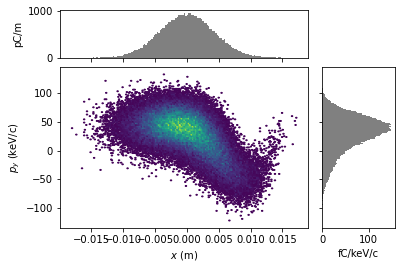

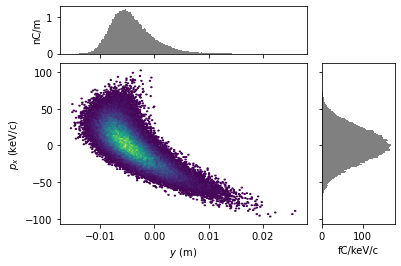

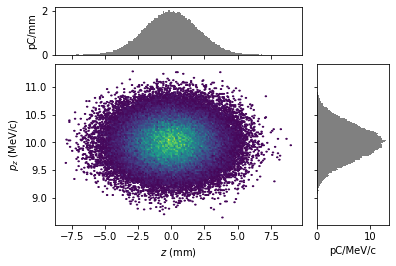

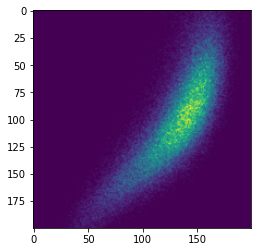

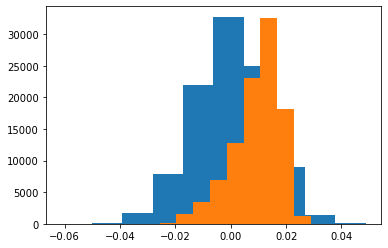

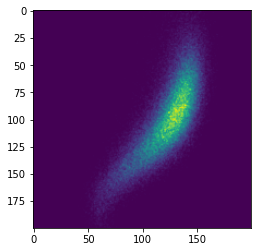

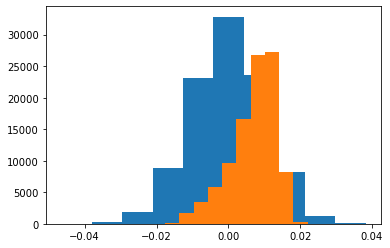

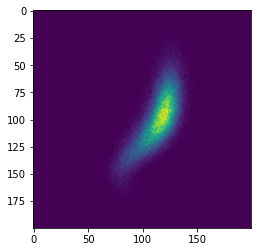

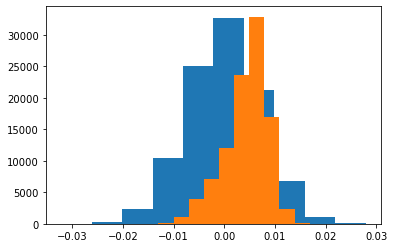

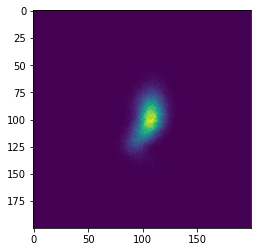

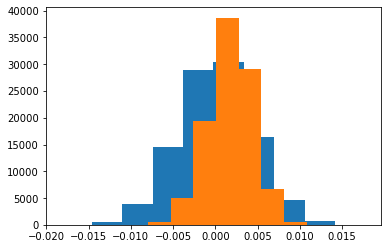

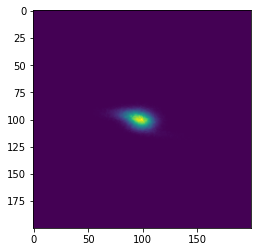

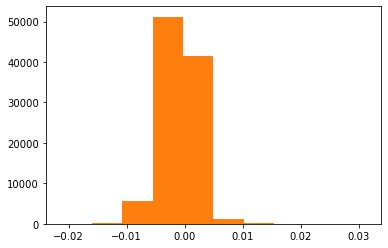

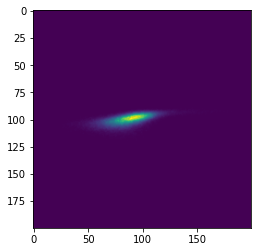

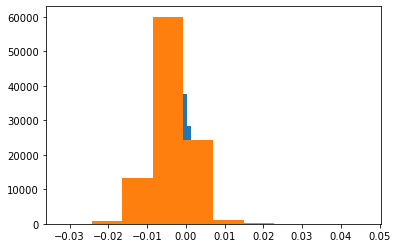

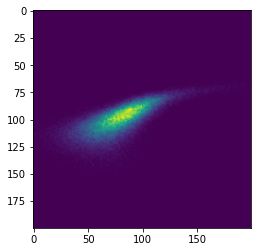

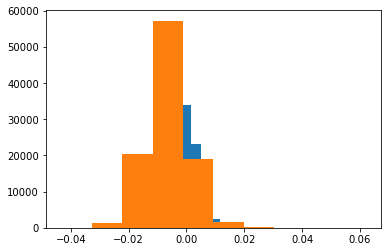

In [2]:
generate_test_images()

In [3]:
import torch
beam_coords = torch.load("ground_truth_dist.pt")
cov = torch.cov(beam_coords.T)

In [4]:
ycov = cov[2:4,2:4]
emit = torch.det(ycov).sqrt()
twiss = ycov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 9.07105814206513e-06
beta 1.7459300237715405
alpha 1.0072262283295972
gamma 1.1538289894822664


In [5]:
xcov = cov[:2,:2]
emit = torch.det(xcov).sqrt()
twiss = xcov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 2.000020002908198e-06
beta 8.99999998781327
alpha 4.999999996620286
gamma 2.8888888890454405


In [6]:
beam_coords.shape

torch.Size([100000, 6])

In [7]:
bins = torch.load("bins.pt")

In [8]:
bins[1]-bins[0]

tensor(0.0003)